<a href="https://colab.research.google.com/github/RgomezRo/capstone/blob/main/EDA_Quotas_Emisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuotas de Emisiones GEI

##1. Importar el drive y las librerias y descargar el csv

###1.1. Importar drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1.2. Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import math
plt.style.use("ggplot")
from sklearn import model_selection 
from sklearn import metrics 

### 1.3. Descargar csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MÁSTER DATA SCIENC/DATA SCIENCE EJERCICIOS/CSV Huella de Carbono/Environment_Emissions_by_Sector_E_All_Data_(Normalized).csv", sep=",", index_col=0, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



###1.4. Visualización del DataFrame

In [ ]:
df.head().T

Area Code,2,2,2,2,2
Area,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Item Code,6996,6996,6996,6996,6996
Item,Farm-gate emissions,Farm-gate emissions,Farm-gate emissions,Farm-gate emissions,Farm-gate emissions
Element Code,726313,726313,726313,726313,726313
Element,Emissions Share (CO2eq) (AR5),Emissions Share (CO2eq) (AR5),Emissions Share (CO2eq) (AR5),Emissions Share (CO2eq) (AR5),Emissions Share (CO2eq) (AR5)
Year Code,1990,1991,1992,1993,1994
Year,1990,1991,1992,1993,1994
Unit,%,%,%,%,%
Value,80.2607,80.8281,86.8858,86.14,85.3637
Flag,Fc,Fc,Fc,Fc,Fc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683948 entries, 2 to 5873
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Area          1683948 non-null  object 
 1   Item Code     1683948 non-null  int64  
 2   Item          1683948 non-null  object 
 3   Element Code  1683948 non-null  int64  
 4   Element       1683948 non-null  object 
 5   Year Code     1683948 non-null  int64  
 6   Year          1683948 non-null  int64  
 7   Unit          1683948 non-null  object 
 8   Value         1683948 non-null  float64
 9   Flag          1683948 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 141.3+ MB


## 2. Data Understanding

###2.1. Análisis univariante de datos


2.1.1. Distibución de los valores TARGET

In [ ]:
TARGET="Value"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a95c32990>]],
      dtype=object)

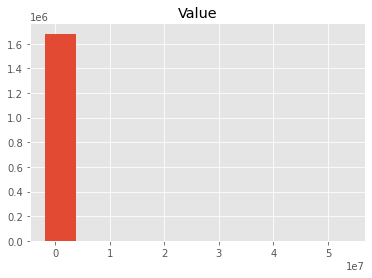

In [ ]:
df.hist(column="Value")

2.1.2. Distribución de las variables independientes

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="uint8") and len(dataset[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="uint8") and len(dataset[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df)

Numéricas

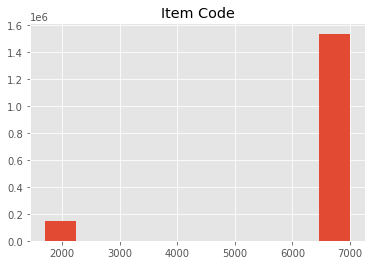

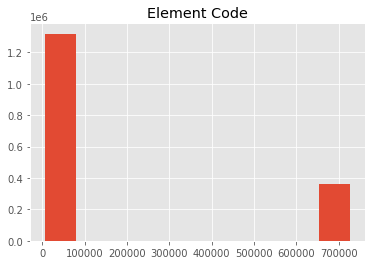

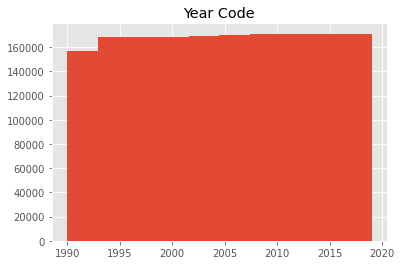

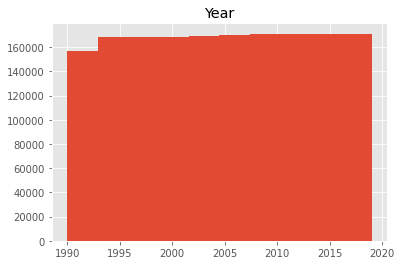

In [ ]:
for i in lista_numericas:
  df.hist(column=i)

Categóricas

In [ ]:
for i in lista_categoricas:
  print(i, df[i].unique(), "\n")

Area ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'China' 'China, Hong Kong SAR' 'China, Macao SAR'
 'China, mainland' 'China, Taiwan Province of' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Eston

##3. Data Preparation

No hay nulos

##4. Visualización cuotas Emisiones GEI

###4.1. Gráfico de barras horizontales

####Emisiones CO2eq por Áreas que incluyan el Uso de la Tierra, el Cambio de Uso de la Tierra y la Silvicultura

In [ ]:
df_ultimo_año = df[df["Year"]==max(df["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año = df_ultimo_año[ (df_ultimo_año["Element"]=="Emissions (CO2eq) (AR5)") &  (df_ultimo_año["Item"]=='All sectors with LULUCF')]
df_ultimo_año_area = df_ultimo_año.groupby("Area")[[TARGET]].sum().reset_index()
df_ultimo_año_area

,Area,Value
0,Afghanistan,3.307847e+04
1,Africa,4.777883e+06
2,Albania,9.346266e+03
3,Algeria,2.815507e+05
4,American Samoa,-4.114590e+01
...,...,...
260,Western Sahara,-1.043568e+02
261,World,5.399973e+07
262,Yemen,3.657652e+04
263,Zambia,9.439525e+04


In [ ]:
tabla_orden = df_ultimo_año_area.sort_values("Value",ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Area,Value
0,European Union (27),3.644844e+06
1,India,3.848732e+06
2,European Union (28),4.094367e+06
3,South-eastern Asia,4.108186e+06
4,Africa,4.777883e+06
5,Net Food Importing Developing Countries,5.270700e+06
6,Southern Asia,5.809754e+06
7,United States of America,6.229081e+06
8,Europe,6.756433e+06
9,Northern America,7.076020e+06


In [ ]:
fig = px.bar(tabla_orden, x="Value", y="Area", title="Emisiones CO2eq por Área que incluyan LULUCF", text="Value", orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area["Value"])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")


Terminología:

Países No Anexo 1: Paises que no forman parte de l protocolo de Kyoto

Paises Anexo 1: 35 países desarrollados (industrializados) que acordaron limitar sus emisiones de gases que incrementan el efecto invernadero (GEI/GHGs.Protocolo de Kyoto

OECD: organismo de cooperación internacional compuesto por 38 estados, cuyo objetivo es coordinar sus políticas económicas y sociales

Países con bajos ingresos y deficit alimentario: Benin, Burkina Faso, Burundi, Camerún, Chad, Comoras, Congo, Côte d'Ivoire1, Eritrea, Etiopía, Gambia, Ghana1,Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Madagascar, Malawi, Malí,Mauritania, Mozambique, Níger, República Centroafricana, República Democrática del Congo, República Unida de Tanzanía, Rwanda, Santo Tomé y Príncipe, Senegal,Sierra Leona, Somalia, Sudán, Sudán del Sur, Togo, Uganda, Zimbabwe, Haití, Nicaragua, Afganistán, Bangladesh, Kirguistán, Nepal, República Popular, Democrática de Corea, República Árabe Siria, Tayikistán, Uzbekistán y Yemen

Conclusiones: 

1. Los países que no forman parte del tratado de Kyoto emiten mas Gases GEI que los que si forman parte.
2. Los continentes que emiten más gases GEI son Asia, America y Europa
3. Los países que emiten más gases GEI son China, EEUU y Unión Europea




####Emisiones de CO2eq por Producto

In [ ]:
df_ultimo_año = df[df["Year"]==max(df["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año = df_ultimo_año[ (df_ultimo_año["Element"]=="Emissions (CO2eq) (AR5)") ]
df_ultimo_año_area = df_ultimo_año.groupby("Item")[[TARGET]].sum().reset_index()
df_ultimo_año_area

,Item,Value
0,AFOLU,4.886945e+07
1,All sectors with LULUCF,3.195739e+08
2,All sectors without LULUCF,3.083228e+08
3,Emissions on agricultural land,6.691020e+07
4,Energy,2.240021e+08
5,Energy - food systems,2.757044e+07
6,Farm-gate emissions,4.511802e+07
7,Fertilizers Manufacturing,2.432970e+06
8,Food Household Consumption,7.783251e+06
9,Food Packaging,1.901594e+06


In [ ]:
tabla_orden = df_ultimo_año_producto.sort_values("Value",ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Item,Value
0,Food Transport,6.406230e+06
1,Food Waste Disposal,8.196959e+06
2,Waste - food systems,8.196959e+06
3,Food Retail,8.386281e+06
4,Food Household Consumption,1.524405e+07
5,Waste,1.526221e+07
6,LULUCF,2.071731e+07
7,IPCC Agriculture,3.857877e+07
8,Land Use change,4.222759e+07
9,IPPU,4.738155e+07


In [ ]:
fig = px.bar(tabla_orden, x="Value", y="Item", title="Emisiones CO2eq por Producto", text="Value", orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area["Value"])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Acronimos:

LULUCF: Land Use, Land-Use Change and Forestry (Uso de la Tierra, Cambio de Uso de la Tierra y Silvicultura)

AFOLU: Agriculture, Forestry and Other Land Uses (Agricultura, Silvicultura y Otros Usos de la Tierra)

Conclusiones:

1. Las emisiones totales que incluyen el uso de la tierra, cambio de uso y silvicultura son mayores les que las que no las incluyen
2. La mayor parte de las emisiones GEI provienen de la energía, los sistemas alimentarios y las emisiones en tierras agrícolas 

####Cuotas de Emisiones GEI por Elemento

In [ ]:
df_ultimo_año = df[df["Year"]==max(df["Year"])].reset_index(drop=True)

In [ ]:
df_ultimo_año_elemento = df_ultimo_año.groupby("Element")[["Value"]].sum().reset_index()
df_ultimo_año_elemento

,Element,Value
0,Emissions (CH4),1.150947e+07
1,Emissions (CO2),8.900890e+08
2,Emissions (CO2eq) (AR5),1.366081e+09
3,Emissions (F-gases),8.072512e+03
4,Emissions (N2O),4.218482e+05
5,Emissions Share (CH4),1.301334e+05
6,Emissions Share (CO2),1.098135e+05
7,Emissions Share (CO2eq) (AR5),1.185640e+05
8,Emissions Share (F-gases),6.979445e+04
9,Emissions Share (N2O),1.435626e+05


In [ ]:
tabla_orden = df_ultimo_año_elemento.sort_values("Value",ascending=True).tail(20).reset_index(drop=True)
tabla_orden

,Element,Value
0,Emissions (F-gases),8.072512e+03
1,Emissions Share (F-gases),6.979445e+04
2,Emissions Share (CO2),1.098135e+05
3,Emissions Share (CO2eq) (AR5),1.185640e+05
4,Emissions Share (CH4),1.301334e+05
5,Emissions Share (N2O),1.435626e+05
6,Emissions (N2O),4.218482e+05
7,Emissions (CH4),1.150947e+07
8,Emissions (CO2),8.900890e+08
9,Emissions (CO2eq) (AR5),1.366081e+09


In [ ]:
fig = px.bar(tabla_orden, x="Value", y="Element", title= "Emisiones GEI por Elemento", text="Value", orientation="h", width=700, height=700, range_x =[0, max(df_ultimo_año_area["Value"])+10000000])

fig.update_traces(marker_color="#46cdcf", opacity=0.8, textposition="outside")

Terminología:

CO2eq: El dióxido de carbono equivalente es una medida universal utilizada para indicar en términos de CO2, el equivalente de cada uno de los gases de efecto invernadero con respecto a su potencial de calentamiento global

Co2: está ligado fundamentalmente a la quema de los combustibles fósiles (el carbón, el petróleo y el gas)

CH4: se produce de forma natural por la descomposición de la materia orgánica. Los humedales, el ganado (fermentación entérica) y la energía son las principales fuentes que emiten metano a la atmósfera

Conclusiones:

1. La emisiones totales de CO2eq a la atmosfera son de 1.366.080.648 mil toneladas
2. Los elementos GEI más abundantes son el CO2 y en menor proporción CH4

###4.2. Gráfico evolutivo lineal

####Evolutivo Cuotas Emisiones GEI por Area

In [ ]:
evolutivo_lineas_Area = df.groupby(["Area","Year"])["Value"].sum().reset_index().sort_values("Value",ascending=False)

evolutivo_lineas_Area 

,Area,Year,Value
7815,World,2019,3.809741e+08
7814,World,2018,3.766757e+08
7813,World,2017,3.691497e+08
7811,World,2015,3.666066e+08
7810,World,2014,3.654270e+08
...,...,...,...
5894,Romania,2011,-8.926611e+05
5895,Romania,2012,-9.157295e+05
5896,Romania,2013,-9.577192e+05
5897,Romania,2014,-9.592754e+05


In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)

In [ ]:
px.line(evolutivo_lineas_Area,x="Year",y="Value",color="Area",title="Evolutivo Cuotas Emisiones GEI por Área")

Conclusiones:

1. A partir del 2003, la evolución de emisiones GEI, crecen más en los países que no forman parte del tratado de Kyoto y Asia que en el resto de áreas. Este periodo coincide con la entrada en vigor de dicho tratado (2005)

####Evolutivo Cuotas Emisiones GEI por Producto

In [ ]:
evolutivo_lineas_Producto = df.groupby(["Item","Year"])["Value"].sum().reset_index().sort_values("Value",ascending=False)

evolutivo_lineas_Producto 

,Item,Year,Value
59,All sectors with LULUCF,2019,5.511669e+08
58,All sectors with LULUCF,2018,5.473425e+08
57,All sectors with LULUCF,2017,5.365010e+08
89,All sectors without LULUCF,2019,5.304495e+08
56,All sectors with LULUCF,2016,5.295816e+08
...,...,...,...
390,Food Transport - International Bunkers,1990,5.624660e+04
600,International bunkers - food systems,1990,5.624660e+04
542,IPPU - food systems,1992,3.752685e+04
541,IPPU - food systems,1991,1.042320e+04


In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)

In [ ]:
px.line(evolutivo_lineas_Producto,x="Year",y="Value",color="Item",title="Evolutivo Cuotas Emisiones GEI por Producto")

Conclusiones:

1. A partir del 2002, la evolución de emisiones GEI procedentes de la energía crecen más que en el resto de productos

####Evolutivo Cuotas Emisiones GEI por Elemento

In [ ]:
evolutivo_lineas_Elemento = df.groupby(["Element","Year"])["Value"].sum().reset_index().sort_values("Value",ascending=False)

evolutivo_lineas_Elemento

,Element,Year,Value
89,Emissions (CO2eq) (AR5),2019,1.366081e+09
88,Emissions (CO2eq) (AR5),2018,1.352327e+09
87,Emissions (CO2eq) (AR5),2017,1.330534e+09
85,Emissions (CO2eq) (AR5),2015,1.316190e+09
86,Emissions (CO2eq) (AR5),2016,1.314938e+09
...,...,...,...
93,Emissions (F-gases),1993,1.396647e+03
92,Emissions (F-gases),1992,1.281729e+03
91,Emissions (F-gases),1991,1.258933e+03
90,Emissions (F-gases),1990,1.182245e+03


In [ ]:
evolutivo_lineas_Area.sort_values("Year", inplace=True)

In [ ]:
px.line(evolutivo_lineas_Elemento,x="Year",y="Value",color="Element",title="Evolutivo Cuotas Emisiones GEI por Elemento")

Conclusiones:

A partir del 2003, la evolución de emisiones de CO2 crecen más que en el resto de elementos